# Вариант 7
1. Выбрать данные в соответствии с вариантом и построить диаграмму рассеяния.
2. Удалить строки, содержащие пропуски или выбросы в столбцах x или y. \
Вывести список координат точек, признанных выбросами на этом шаге.
3. Построить диаграмму рассеяния в координатах главных компонент.
4. Удалить строки с выбросами в координатах главных компонент и 
соответствующие строки исходных данных. \
Вывести список исходных координат точек, признанных выбросами на этом шаге.
5. Построить диаграмму рассеяния по исходным данным с удаленными выбросами.
6. Для исходных данных с удаленными выбросами найти выборочные средние, \
стандартные отклонения, коэффициенты корреляции Пирсона и Спирмена и их \
пи-значения для гипотезы о независимости.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
FILENAME = "data_sem.xlsx"
datapath = Path() / "data" / FILENAME

data = pd.read_excel(datapath, sheet_name="7", index_col=0, header=0)
data.head()

,0,1
0,7.968888,-7.522656
1,0.891551,-1.049142
2,14.264462,-13.999222
3,5.488584,-7.187490
4,-14.180905,12.670542


In [3]:
data.rename(columns={0: "x", 1: "y"}, inplace=True)
data.head()

,x,y
0,7.968888,-7.522656
1,0.891551,-1.049142
2,14.264462,-13.999222
3,5.488584,-7.187490
4,-14.180905,12.670542


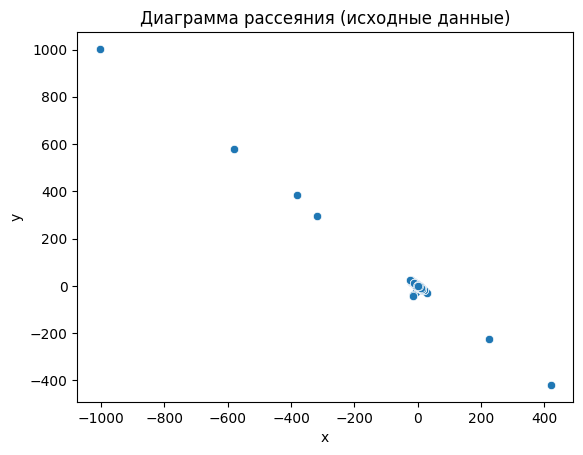

In [4]:
sns.scatterplot(data, x="x", y="y").set_title("Диаграмма рассеяния (исходные данные)")
plt.show()

In [5]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

outliers = data[((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]
for row in outliers.round(2).itertuples(index=False, name=None):
    print(row)

(-317.07, 294.67)
(24.74, -25.02)
(419.65, -419.45)
(-20.68, 22.17)
(-1004.19, 1002.53)
(-5.87, -24.11)
(223.66, -223.73)
(27.62, -27.6)
(-381.64, 382.46)
(-15.45, -38.3)
(28.87, -28.69)
(-579.8, 579.19)
(-22.72, 24.48)
(-23.82, 23.57)
(-15.26, -42.21)


In [6]:
data.shape, outliers.shape

((1000, 2), (15, 2))

In [7]:
data = data.drop(outliers.index).dropna().astype("float64")
data.shape

(981, 2)

In [8]:
sc = StandardScaler()
sc.fit(data)
data_scaled = sc.transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

data_scaled.head()

,x,y
0,1.015743,-0.955043
1,0.120490,-0.129437
2,1.812106,-1.781039
3,0.701995,-0.912298
4,-1.786111,1.620316


In [9]:
pca = PCA()
pca.fit(data)

pca.explained_variance_

array([123.06567349,   1.0363588 ])

In [10]:
u, s, v = np.linalg.svd(data)
v

array([[-0.71005296,  0.70414828],
       [ 0.70414828,  0.71005296]])

In [11]:
data_scores_svd = data_scaled @ v.T
data_scores_svd.columns = [f"PC{i+1}" for i in range(data_scores_svd.shape[1])]
data_scores_svd.head()

,PC1,PC2
0,-1.393723,0.037102
1,-0.176697,-0.007065
2,-2.540806,0.011359
3,-1.140846,-0.153471
4,2.409177,-0.107177


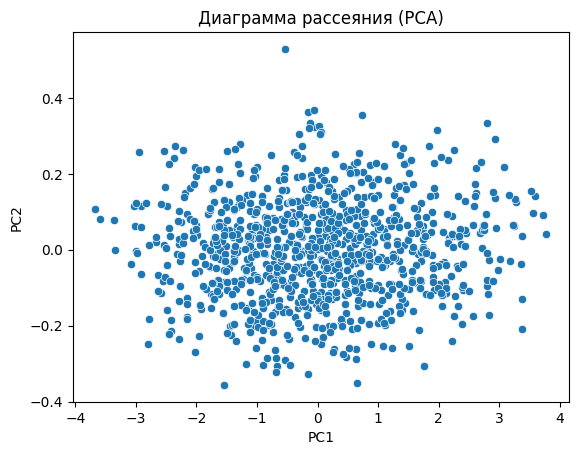

In [12]:
sns.scatterplot(data_scores_svd, x="PC1", y="PC2").set_title("Диаграмма рассеяния (PCA)")
plt.show()

In [13]:
q1_pca = data_scores_svd.quantile(0.25)
q3_pca = data_scores_svd.quantile(0.75)
iqr_pca = q3_pca - q1_pca

outliers_pca = data_scores_svd[((data_scores_svd < (q1_pca - 1.5 * iqr_pca)) | (data_scores_svd > (q3_pca + 1.5 * iqr_pca))).any(axis=1)]
# outliers_pca

for row in data.loc[outliers_pca.index].round(2).itertuples(index=False, name=None):
    print(row)

(6.67, -10.58)
(2.87, 1.09)
(-5.7, 1.64)
(-2.17, 5.98)
(2.28, 1.74)
(5.87, -0.02)


In [14]:
data.drop(outliers_pca.index, inplace=True)
data.shape

(975, 2)

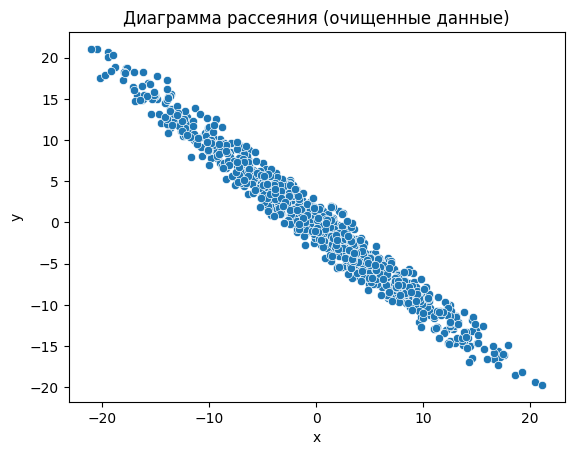

In [15]:
sns.scatterplot(data, x="x", y="y").set_title("Диаграмма рассеяния (очищенные данные)")
plt.show()

In [16]:
data.describe().loc[["mean", "std"]]

,x,y
mean,-0.071394,-0.034289
std,7.925291,7.858950


In [17]:
print(stats.pearsonr(data["x"], data["y"]))
print(stats.spearmanr(data["x"], data["y"]))

PearsonRResult(statistic=np.float64(-0.9842013639837766), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(-0.9825020003055485), pvalue=np.float64(0.0))
